# 遗传算法求函数最大值
求下述二元函数最大值：$$max f(x_1,x_2)=x_1^2+(x_1+x_2)^2$$ $$|x_i|\le10$$

导入相应的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
from mpl_toolkits.mplot3d import Axes3D

定义目标函数

In [2]:
def GoalFunction (x1,x2):
    return x1**2+(x1+x2)**2

绘制目标函数图像

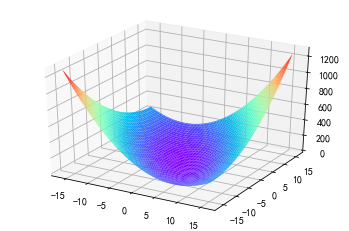

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.arange(-16,16,0.25)
y=np.arange(-16,16,0.25)
x,y=np.meshgrid(x,y)
z=GoalFunction(x,y)
ax.plot_surface(x,y,z,cmap=plt.get_cmap('rainbow'))

创建一个向量，记录2进制每一位上的值。根据题目需要，最大为$2^4=16$，最小为$2^{-20}<10^{-6}$,一个变量25位，总共50位

In [4]:
bitValue=np.logspace(-20,4,25,base=2)
bitValue

array([9.53674316e-07, 1.90734863e-06, 3.81469727e-06, 7.62939453e-06,
       1.52587891e-05, 3.05175781e-05, 6.10351562e-05, 1.22070312e-04,
       2.44140625e-04, 4.88281250e-04, 9.76562500e-04, 1.95312500e-03,
       3.90625000e-03, 7.81250000e-03, 1.56250000e-02, 3.12500000e-02,
       6.25000000e-02, 1.25000000e-01, 2.50000000e-01, 5.00000000e-01,
       1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
       1.60000000e+01])

创建一个种群，含有20个个体

In [5]:
population=np.random.randint(0,2,(20,25*2))
population

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1

计算目标函数值.因为本体是求目标最小值，所以需要通过e的指数函数转换一下，当目标函数值接近最小值0的时候，fitvalue取得最大值1，当目标函数值越大时，fitvalue越接近0，以此求出适应度函数。

In [6]:
x1=np.dot(bitValue,population[:,0:25].T)
x2=np.dot(bitValue,population[:,25:25*2].T)
value=GoalFunction(x1,x2)
#fitvalue=np.exp(-value)#通过e的指数函数来反转最小值的适应度函数
fitvalue=1/(value+0.0000001)
fitness=fitvalue/fitvalue.sum()
value,fitness

(array([ 310.26825161, 1638.26582473, 3051.92908821,  710.92302218,
         812.55263003, 1028.48141788,  887.77302696, 1584.62789342,
        2315.34197067,  121.45796085,  393.36056993, 1165.05882347,
        4770.89700863,  624.55180857, 1866.3334022 , 3106.56141381,
         280.73801494, 2344.3499011 ,  447.89593854, 2401.53643586]),
 array([0.1043047 , 0.01975408, 0.01060393, 0.04552172, 0.03982811,
        0.03146623, 0.0364535 , 0.02042274, 0.01397739, 0.26644969,
        0.08227168, 0.02777751, 0.0067833 , 0.05181706, 0.01734011,
        0.01041745, 0.11527629, 0.01380444, 0.07225436, 0.01347572]))

根据目标函数值筛选可以进行繁殖的个体

In [7]:
index=np.random.choice(len(fitness),size=len(fitness),p=fitness)
index

array([ 0,  0,  0, 16, 16,  9,  4, 17, 10, 16,  0,  9, 18, 18, 18,  5,  0,
        3,  0,  4], dtype=int64)

筛选后进行一次打乱顺序

In [8]:
newPopulation=population[index]
np.random.shuffle(newPopulation)

相邻的两个个体进行交配产生下一代

In [9]:
def reproduce(a,b,exchangeNumber):
    exchangeSit=np.random.randint(0,len(a),exchangeNumber)
    a[exchangeSit]=a[exchangeSit]
    b[exchangeSit]=b[exchangeSit]
    return a,b
for i in range(len(newPopulation),2):
    a=newPopulation[i]
    b=newPopulation[i+1]
    newPopulation[i],newPopulation[i+1]=reproduce(a,b,10)

根据变异率，随机选择基因变异位置

In [10]:
def variation(population,rate):
    variateSite=np.random.random(population.shape)<=rate
    population[variateSite]=np.where(population[variateSite]==1,0,1)
    return population
newPopulation=variation(newPopulation,0.05)

至此，完成一次迭代计算。需要经过数次迭代计算才能完成求解

综合上述代码，构造一个类。并添加一些中间变量记录迭代过程，用于分析模型

In [11]:
class GA(object):
    def __init__(self,GoalFunction,individualNumber,iterateGeneration,variateRate,exchangeNumber,bitNumber,maxBit,minBit):
        self.population=np.random.randint(0,2,(individualNumber,bitNumber*2))
        self.bitValue=np.logspace(minBit,maxBit,bitNumber,base=2)
        self.GoalFunction=GoalFunction
        self.iteration=iterateGeneration
        self.variateRate=variateRate
        self.exchangeNumber=exchangeNumber
        self.bitNumber=bitNumber
        self.mean=[]
        self.max=[]
        self.min=[]
    def __getValue(self):
        x1=np.dot(self.bitValue,self.population[:,0:self.bitNumber].T)
        x2=np.dot(self.bitValue,self.population[:,self.bitNumber:self.bitNumber*2].T)
        value=self.GoalFunction(x1,x2)
        self.mean.append(value.mean())
        self.max.append(value.max())
        self.min.append(value.min())
        return value
    def reproduce(self,a,b,exchangeNumber):
        exchangeSit=np.random.randint(0,len(a),exchangeNumber)
        a[exchangeSit]=a[exchangeSit]
        b[exchangeSit]=b[exchangeSit]
        return a,b
    def variation(self,population,rate):
        variateSite=np.random.random(population.shape)<=rate
        population[variateSite]=np.where(population[variateSite]==1,0,1)
        return population
    def run(self):
        for i in range(self.iteration):
            value=self.__getValue()
            #fitvalue=np.exp(-value)#通过e的指数函数来反转最小值的适应度函数
            fitvalue=1/(value+0.0000001)
            fitness=fitvalue/fitvalue.sum()
            index=np.random.choice(len(fitness),size=len(fitness),p=fitness)
            newPopulation=self.population[index]
            np.random.shuffle(newPopulation)
            for i in range(len(newPopulation),2):
                a=newPopulation[i]
                b=newPopulation[i+1]
                newPopulation[i],newPopulation[i+1]=self.reproduce(a,b,self.exchangeNumber)
            newPopulation=self.variation(newPopulation,self.variateRate)
            self.population=newPopulation.copy()
    def resualt(self):
        return min(self.min)

下面为，GA模型的一个计算实例。计算结果比较接近理论最小值0。目标函数为上面提到的函数，种群中个体的个数为50、迭代的代数500、变异率0.05和交配时基因交换个数为10个。

In [12]:
def GoalFunction (x1,x2):
    return x1**2+(x1+x2)**2
model=GA(GoalFunction,50,500,0.05,10,25,4,-20)
model.run()
model.resualt()

1.8189894035458565e-12

种群中个体的个数、迭代的代数、变异率和交配时基因交换个数等参数都会影响GA模型的求解效果，下面将一一对各参数进行分析。

c:\users\weijunpeipad\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


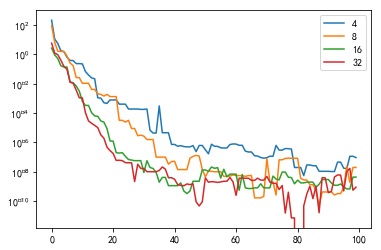

In [13]:
model1=GA(GoalFunction,16,100,0.05,10,25,4,-20)
model2=GA(GoalFunction,32,100,0.05,10,25,4,-20)
model3=GA(GoalFunction,64,100,0.05,10,25,4,-20)
model4=GA(GoalFunction,128,100,0.05,10,25,4,-20)
model1.run()
model2.run()
model3.run()
model4.run()
plt.plot(range(100),model1.min,range(100),model2.min,range(100),model3.min,range(100),model4.min)
plt.yscale('log')
plt.legend(['4','8','16','32'])

由上图可见，GA模型一开始指数的速度收敛，但是后面由于基因变异，最小值在不断的波动，波动幅度较大。此外随着种群个体数增加，收敛速度越快。

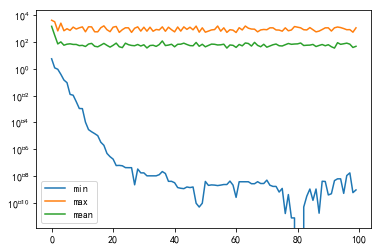

In [14]:
plt.plot(range(100),model4.min,range(100),model4.max,range(100),model4.mean)
plt.yscale('log')
plt.legend(['min','max','mean'])

上图中，蓝色的线是种群的最小值，橙色的线是种群的最大值，绿线是平均值。由图可以看出，最小值收敛较快，而最大值几乎不收敛，一直维持在较高的位置。

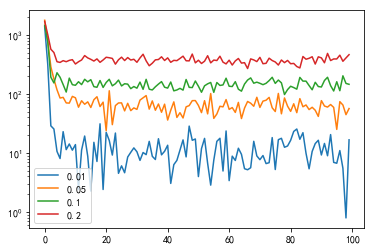

In [15]:
model1=GA(GoalFunction,128,100,0.01,10,25,4,-20)
model2=GA(GoalFunction,128,100,0.05,10,25,4,-20)
model3=GA(GoalFunction,128,100,0.1,10,25,4,-20)
model4=GA(GoalFunction,128,100,0.2,10,25,4,-20)
model1.run()
model2.run()
model3.run()
model4.run()
plt.plot(range(100),model1.mean,range(100),model2.mean,range(100),model3.mean,range(100),model4.mean)
plt.yscale('log')
plt.legend(['0.01','0.05','0.1','0.2'])

基因变异率越小，种群的平均值越小。但是变异率越小，种群的平均值波动也越大。

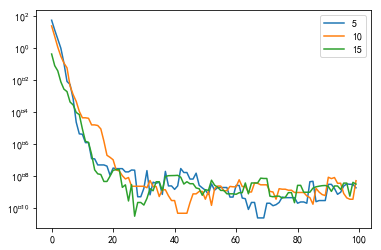

In [16]:
model1=GA(GoalFunction,128,100,0.05,5,25,4,-20)
model2=GA(GoalFunction,128,100,0.05,10,25,4,-20)
model3=GA(GoalFunction,128,100,0.05,15,25,4,-20)
model1.run()
model2.run()
model3.run()
plt.plot(range(100),model1.min,range(100),model2.min,range(100),model3.min)
plt.yscale('log')
plt.legend(['5','10','15'])

从图中可以看出，交配时基因交换的个数进本没有影响

## 观察和思考
因为本体是求目标函数的最小值，并且最小值为0.这给适应度函数的求解带来了麻烦，采用倒数或者e的幂函数反转适应度函数效果都不太好。以为目标函数值越大，适应度函数越接近于零，在选择下一代时，导致选择结果很单一，从而过早收敛，基因交换数量在这里不起作用。  
因为基因变异的位置是随机选择的，很有可能在最高位上变异，虽然只变异了一个位置，但是会给目标函数带来巨大的改变，因此，种群中的最大值一直维持在1000附近。